# Group 43 - ML System optimization Project - Part 1 CPU Based Methods

## Contributions

| Name                        | BITS ID       | Contribution |
|-----------------------------|--------------|-------------|
| SUBHRANSU MISHRA            | 2023AC05489  | 100%        |
| AGHAV SAYALI SAKHARM        | 2023AC05435  | 100%        |
| LAKSHMISRINIVAS PERAKAM     | 2023AC05540  | 100%        |
| SHAILESH KUMAR SINGH        | 2023AC05475  | 100%        |
| SATISH KUMAR DUMPETI        | 2023AC05885  | 0%          |

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from concurrent.futures import ThreadPoolExecutor

## Section 1: Load and Inspect Dataset

## Data Preprocessing (Using Dask)

In [5]:
# Load dataset from uploaded file
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read CSV file
df = pd.read_csv(filename)
print(df.head())

print("### Dataset loaded successfully.")

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Print column names to verify structure
print("\n### Column Names:\n", df.columns)

# Display dataset information
print("\n### Dataset Info:\n")
print(df.info())
print("\n### Missing Values:\n")
print(df.isnull().sum())


Saving creditcard.csv to creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

## Section 2: Data Visualization

### Class Distribution


### Class Distribution:

class
0    284315
1       492
Name: count, dtype: int64


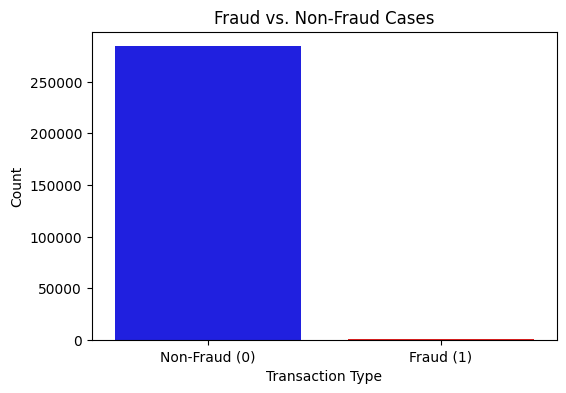

In [13]:
if 'class' in df.columns:
    print("\n### Class Distribution:\n")
    print(df['class'].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['class'], hue=df['class'], palette={0: "blue", 1: "red"}, legend=False)
    plt.title("Fraud vs. Non-Fraud Cases")
    plt.xlabel("Transaction Type")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
    plt.show()
else:
    print("Error: 'class' column not found in dataset.")

### Correlation Heatmap

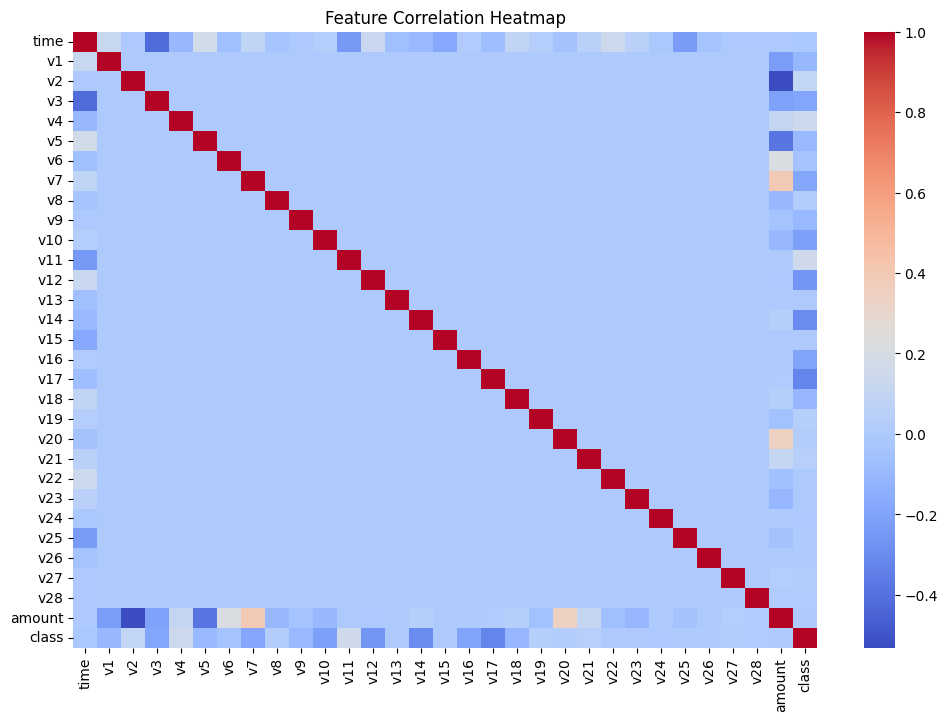

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

### Boxplot for Transaction Amounts

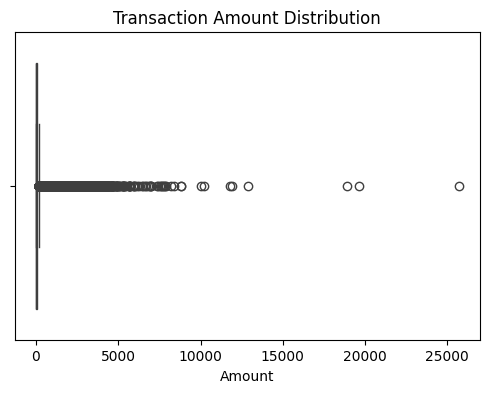

In [15]:
if 'amount' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['amount'])
    plt.title("Transaction Amount Distribution")
    plt.xlabel("Amount")
    plt.show()
else:
    print("Error: 'amount' column not found in dataset.")

### Distribution of Time Feature

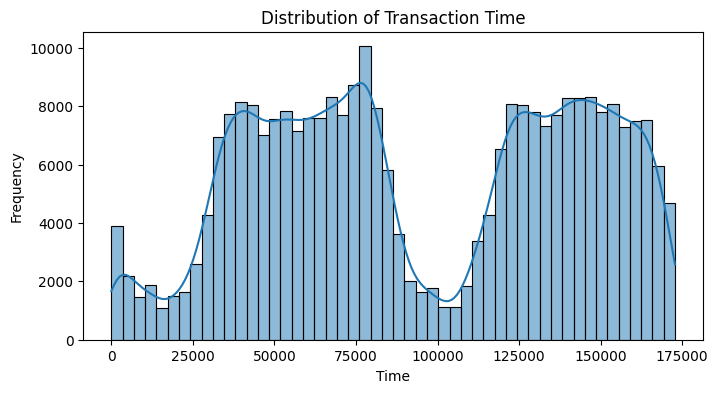

In [16]:
if 'time' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['time'], bins=50, kde=True)
    plt.title("Distribution of Transaction Time")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Error: 'time' column not found in dataset.")

## Section 3: Data Preprocessing

In [17]:
# Selecting Features and Target
features = df.drop(columns=['class'])
target = df['class']

# Scaling numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("### Data Preprocessing Completed: Features scaled and dataset split.")

### Data Preprocessing Completed: Features scaled and dataset split.


## Section 4: Model Training and Evaluation


### Random Forest Model Results:
Training Time: 403.56 seconds
Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



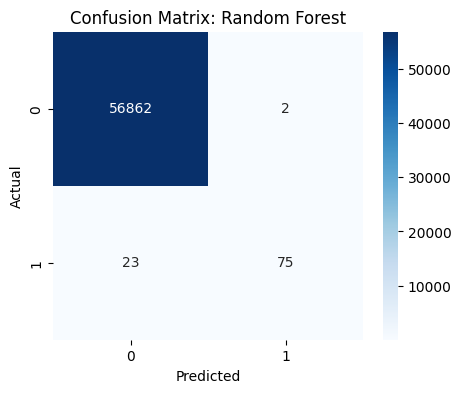

Fraud Detection Rate (FDR): 0.7653

### AdaBoost Model Results:
Training Time: 236.05 seconds
Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.70      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



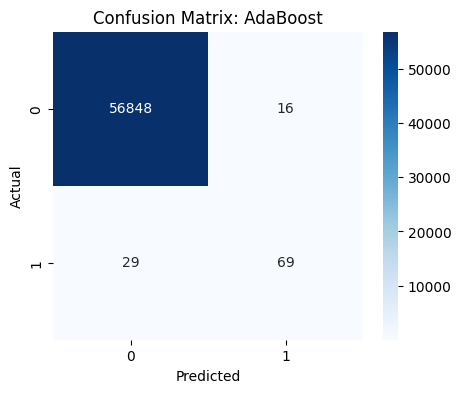

Fraud Detection Rate (FDR): 0.7041

### Gradient Boosting Model Results:
Training Time: 692.61 seconds
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



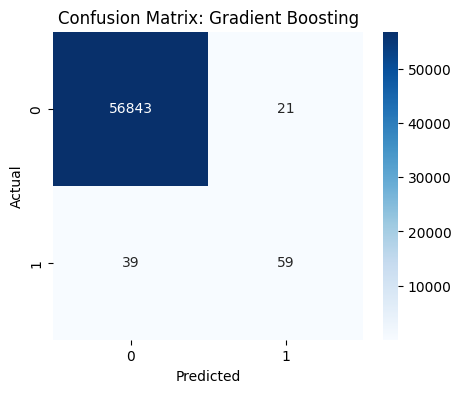

Fraud Detection Rate (FDR): 0.6020


In [18]:
def train_and_evaluate(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n### {model_name} Model Results:")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Fraud Detection Rate (FDR)
    tp = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives
    fdr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
    print(f"Fraud Detection Rate (FDR): {fdr:.4f}")

# Train and evaluate models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

train_and_evaluate(rf_model, "Random Forest")
train_and_evaluate(adaboost_model, "AdaBoost")
train_and_evaluate(gb_model, "Gradient Boosting")

## Section 5: Mini-Batch Parallel Training


### Random Forest Mini-Batch Training Results:
Training Time: 68.74 seconds
Accuracy: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.50      0.64        98

    accuracy                           1.00     56962
   macro avg       0.94      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



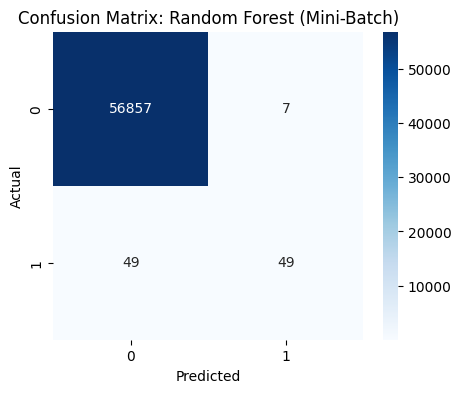

Fraud Detection Rate (FDR): 0.5000

### AdaBoost Mini-Batch Training Results:
Training Time: 153.88 seconds
Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.59      0.71        98

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



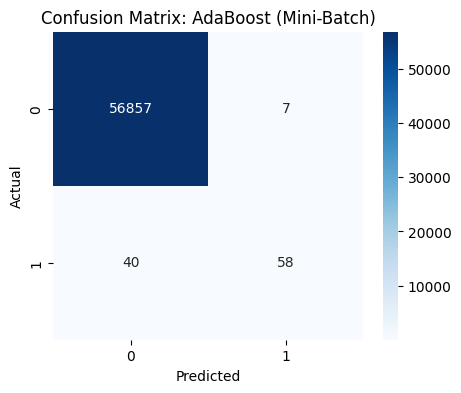

Fraud Detection Rate (FDR): 0.5918

### Gradient Boosting Mini-Batch Training Results:
Training Time: 336.48 seconds
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.66      0.71        98

    accuracy                           1.00     56962
   macro avg       0.88      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962



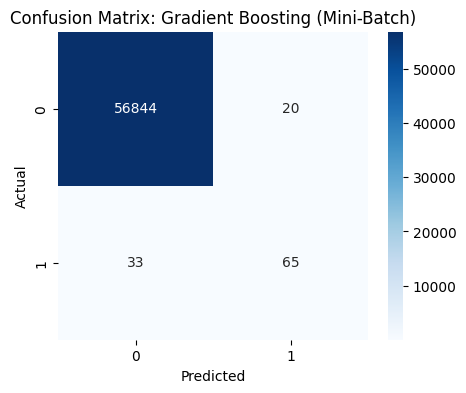

Fraud Detection Rate (FDR): 0.6633


In [19]:
def mini_batch_train(model, model_name, batch_size=10000):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)
    num_batches = len(X_train) // batch_size
    start_time = time.time()

    for i in range(num_batches + 1):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]

        if len(X_batch) > 0:
            model.fit(X_batch, y_batch)

    end_time = time.time()
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n### {model_name} Mini-Batch Training Results:")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name} (Mini-Batch)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Fraud Detection Rate (FDR)
    tp = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives
    fdr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
    print(f"Fraud Detection Rate (FDR): {fdr:.4f}")

# Mini-Batch Training
mini_batch_train(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
mini_batch_train(AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost")
mini_batch_train(GradientBoostingClassifier(n_estimators=100, random_state=42), "Gradient Boosting")

## Section 6: Parallel Training with CPU Multithreading Optimization (18 Min vs 15 Min)





### Random Forest Model Results:
Training Time: 657.61 seconds
Accuracy: 0.9996


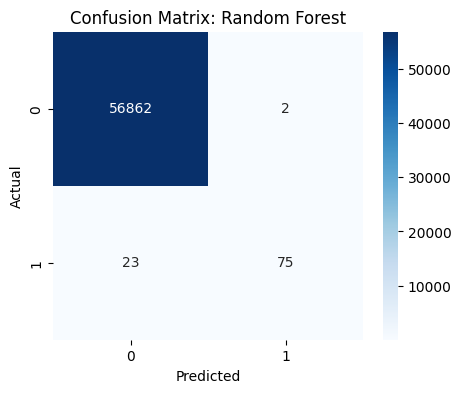

Fraud Detection Rate (FDR): 0.7653

### AdaBoost Model Results:
Training Time: 707.11 seconds
Accuracy: 0.9992


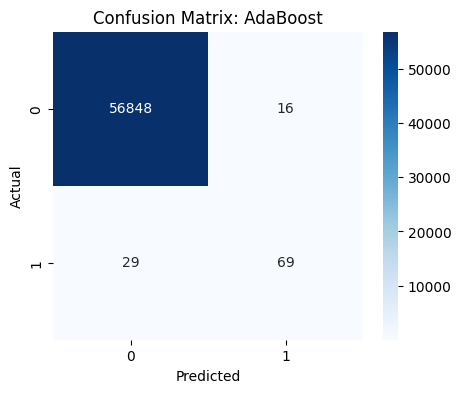

Fraud Detection Rate (FDR): 0.7041

### Gradient Boosting Model Results:
Training Time: 1135.56 seconds
Accuracy: 0.9989


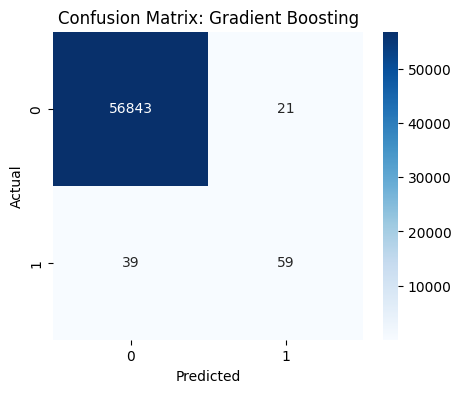

Fraud Detection Rate (FDR): 0.6020


In [20]:
# Load dataset
file_name = "creditcard.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.lower()

# Selecting Features and Target
features = df.drop(columns=['class'])
target = df['class']

# Scaling numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n### {model_name} Model Results:")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Fraud Detection Rate (FDR)
    tp = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives
    fdr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
    print(f"Fraud Detection Rate (FDR): {fdr:.4f}")

# Train models sequentially using multithreading for faster training
def parallel_training():
    models = [
        (RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), "Random Forest"),
        (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
        (GradientBoostingClassifier(n_estimators=100, random_state=42), "Gradient Boosting")
    ]

    with ThreadPoolExecutor(max_workers=3) as executor:
        futures = [executor.submit(train_and_evaluate, model, name) for model, name in models]
        for future in futures:
            future.result()

# Run training in parallel
parallel_training()

## Section 7 : Using DASK vs Spark For Model Training

In [2]:
import dask
from dask import delayed, compute
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier as SparkRF, GBTClassifier as SparkGBT
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [22]:
# Load dataset
file_name = "creditcard.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.lower()

# Selecting Features and Target
features = df.drop(columns=['class'])
target = df['class']

# Scaling numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Function to train and evaluate models using Dask with Fraud Detection Rate (FDR)
def dask_train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Fraud Detection Rate (FDR)
    tp = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives
    fdr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

    print(f"\n### {model_name} Model Results (Dask):")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Fraud Detection Rate (FDR): {fdr:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model_name, end_time - start_time, accuracy, fdr

# Wrap models in Dask delayed
dask_models = [
    delayed(dask_train_and_evaluate)(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), "Random Forest (Dask)", X_train, y_train, X_test, y_test),
    delayed(dask_train_and_evaluate)(AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost (Dask)", X_train, y_train, X_test, y_test),
    delayed(dask_train_and_evaluate)(GradientBoostingClassifier(n_estimators=100, random_state=42), "Gradient Boosting (Dask)", X_train, y_train, X_test, y_test)
]

# Execute training in parallel using Dask
results = compute(*dask_models)
for model_name, train_time, accuracy, fdr in results:
    print(f"{model_name}: {train_time:.2f}s, Accuracy: {accuracy:.4f}, Fraud Detection Rate (FDR): {fdr:.4f}")


### Random Forest (Dask) Model Results (Dask):
Training Time: 460.74 seconds
Accuracy: 0.9996
Fraud Detection Rate (FDR): 0.7653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   23    75]]

### AdaBoost (Dask) Model Results (Dask):
Training Time: 497.30 seconds
Accuracy: 0.9992
Fraud Detection Rate (FDR): 0.7041
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.70      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     569

In [9]:
# Load dataset
file_name = "creditcard.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.lower()

# Selecting Features and Target
features = df.drop(columns=['class'])
target = df['class']

# Scaling numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Stop any existing Spark session
try:
    spark.stop()
except:
    pass

# Initialize Spark Session
spark = SparkSession.builder.appName("FraudDetectionML").getOrCreate()

# Convert Pandas to Spark DataFrame
spark_df = spark.createDataFrame(pd.concat([pd.DataFrame(features), target], axis=1))

# Rename class to "label" as class is reserved word
spark_df = spark_df.withColumnRenamed("class", "label")

# Assemble features
feature_cols = [str(i) for i in range(features.shape[1])]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df = assembler.transform(spark_df).select("features", "label")

# Split into training and test sets
train_df, test_df = spark_df.randomSplit([0.8, 0.2], seed=42)

# Function to train and evaluate models using Spark ML with Fraud Detection Rate (FDR)
def spark_train_and_evaluate(model, model_name, train_df, test_df):
    start_time = time.time()
    model_trained = model.fit(train_df)
    end_time = time.time()

    predictions = model_trained.transform(test_df)
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)

    # Extract predictions and labels
    y_pred = [row.prediction for row in predictions.select("prediction").collect()]
    y_true = [row["label"] for row in predictions.select("label").collect()]

    # Fraud Detection Rate (FDR)
    tp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))  # True Positives
    fn = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))  # False Negatives
    fdr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

    print(f"\n### {model_name} Model Results (Spark):")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Fraud Detection Rate (FDR): {fdr:.4f}")

    return model_name, end_time - start_time, accuracy, fdr

# Train and evaluate models using Spark ML
spark_rf = SparkRF(labelCol="label", featuresCol="features", numTrees=100)
spark_gbt = SparkGBT(labelCol="label", featuresCol="features", maxIter=100)

rf_results = spark_train_and_evaluate(spark_rf, "Random Forest (Spark)", train_df, test_df)
gbt_results = spark_train_and_evaluate(spark_gbt, "Gradient Boosting (Spark)", train_df, test_df)

# Stop Spark session
spark.stop()

# Print final results
for model_name, train_time, accuracy, fdr in [rf_results, gbt_results]:
    print(f"{model_name}: {train_time:.2f}s, Accuracy: {accuracy:.4f}, Fraud Detection Rate (FDR): {fdr:.4f}")


### Random Forest (Spark) Model Results (Spark):
Training Time: 59.83 seconds
Accuracy: 0.9994
Fraud Detection Rate (FDR): 0.7396

### Gradient Boosting (Spark) Model Results (Spark):
Training Time: 413.97 seconds
Accuracy: 0.9995
Fraud Detection Rate (FDR): 0.7188
Random Forest (Spark): 59.83s, Accuracy: 0.9994, Fraud Detection Rate (FDR): 0.7396
Gradient Boosting (Spark): 413.97s, Accuracy: 0.9995, Fraud Detection Rate (FDR): 0.7188


### **Summary of Tools and Libraries Used**

| **Component**                  | **Tool/Library Used**                         | **Purpose** |
|--------------------------------|----------------------------------------------|------------|
| **Data Processing**            | **Pandas**                                    | Data handling & preprocessing |
|                                | **Dask**                                      | Parallel data processing |
| **Feature Scaling**            | **sklearn.preprocessing (StandardScaler)**   | Normalizing feature values |
| **Train-Test Split**           | **sklearn.model_selection (train_test_split)** | Splitting dataset into training & testing |
| **Model Training (CPU)**       | **sklearn.ensemble (RF, AdaBoost, GB)**      | Standard ML model training |
| **Mini-Batch Training**        | **sklearn.utils (shuffle)**                   | Splitting data into smaller batches |
| **Multi-threading**            | **ThreadPoolExecutor**                        | Parallel execution on CPU |
| **Distributed Computing**      | **Dask**                                      | Parallel training using multiple CPU cores |
|                                | **Apache Spark MLlib**                        | Distributed training across multiple nodes |
| **GPU Acceleration**           | **RAPIDS cuML**                               | GPU-accelerated Random Forest & Gradient Boosting |
| **Evaluation Metrics**         | **sklearn.metrics (accuracy_score, confusion_matrix)** | Measuring model performance |
| **Visualization**              | **Matplotlib, Seaborn**                       | Graphical representation of results |
